In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
# Load data
df = pd.read_csv(r"D:\AI\project\time_series_dataset24.csv")
df

,PIN1,PTC,PDT1,PDT2,PGV1,PGV2,PGV3,PDT3,PDT4,Patm,...,FricTorque,Pin,Pdiff,GV,AGV,ATB1,ATB2,Group,Stage,Head
0,0.002862,0.001300,0.004675,0.004430,0.006501,0.005931,0.006195,0.020413,0.024108,6.285425,...,1.246962,6.118898,6.649683,2.636216,0.297385,-0.163528,0.224599,DPL,1,24
1,0.002862,0.001297,0.004674,0.004431,0.006519,0.005950,0.006197,0.020705,0.022757,6.291337,...,1.250575,6.142219,6.677930,2.635310,0.205243,-0.051941,0.307536,DPL,1,24
2,0.002862,0.001292,0.004673,0.004432,0.006524,0.005949,0.006208,0.021536,0.021985,6.287724,...,1.245649,6.096892,6.639173,2.634754,0.124694,-0.024502,0.252041,DPL,1,24
3,0.002863,0.001287,0.004673,0.004432,0.006537,0.005971,0.006211,0.021012,0.020271,6.283783,...,1.266670,6.125139,6.676617,2.634428,0.108219,-0.042185,0.274605,DPL,1,24
4,0.002865,0.001284,0.004673,0.004431,0.006531,0.005995,0.006229,0.019912,0.018715,6.288381,...,1.247619,6.032514,6.704535,2.634260,0.229651,-0.048283,0.203255,DPL,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13823995,0.002673,0.001582,0.004092,0.003841,0.007138,0.006577,0.006932,0.021125,-0.006264,6.318599,...,1.142187,5.881754,6.534067,4.384009,0.244296,0.208429,0.197766,FL,9,24
13823996,0.002672,0.001587,0.004089,0.003838,0.007111,0.006554,0.006877,0.022708,-0.005751,6.314329,...,1.134304,5.889965,6.556730,4.383941,0.122864,0.210258,0.222160,FL,9,24
13823997,0.002671,0.001589,0.004089,0.003834,0.007081,0.006527,0.006842,0.027942,-0.002138,6.316629,...,1.127078,5.876498,6.520928,4.383734,0.261382,0.145623,0.202035,FL,9,24
13823998,0.002670,0.001585,0.004087,0.003829,0.007069,0.006505,0.006827,0.026696,-0.002301,6.320242,...,1.135289,5.878797,6.571511,4.383563,0.193038,0.041963,0.208134,FL,9,24


In [5]:
df = df.drop(['PIN1','PTC','WTmp','Head','Patm','rpm','Speed','Flow','Thrust','GenTorque','FricTorque','Pin','Pdiff','GV','AGV','Group', 'PDT2','PDT4','PGV1','PGV3'], axis= 1)
print(df)

              PDT1      PGV2      PDT3      ATB1      ATB2  Stage
0         0.004675  0.005931  0.020413 -0.163528  0.224599      1
1         0.004674  0.005950  0.020705 -0.051941  0.307536      1
2         0.004673  0.005949  0.021536 -0.024502  0.252041      1
3         0.004673  0.005971  0.021012 -0.042185  0.274605      1
4         0.004673  0.005995  0.019912 -0.048283  0.203255      1
...            ...       ...       ...       ...       ...    ...
13823995  0.004092  0.006577  0.021125  0.208429  0.197766      9
13823996  0.004089  0.006554  0.022708  0.210258  0.222160      9
13823997  0.004089  0.006527  0.027942  0.145623  0.202035      9
13823998  0.004087  0.006505  0.026696  0.041963  0.208134      9
13823999  0.004087  0.006499  0.024260  0.105378  0.202035      9

[13824000 rows x 6 columns]


In [7]:
# Set parameters
win_len = 1000
stride = 200

X = []
Y = []

# Precompute feature column indexes (all except 'Stage')
feature_cols = df.columns[:-1]

# Loop through the dataframe using a sliding window over the entire dataset
for i in range(0, len(df) - win_len, stride):
    window = df.iloc[i:i + win_len]
    
    # Check if the stage is constant across the window (optional, can skip for large data)
    if len(window['Stage'].unique()) == 1:
        segment = window[feature_cols].values  # shape: (win_len, 5)
        label = window['Stage'].iloc[-1]       # scalar label

        X.append(segment)
        Y.append(label)

    # You can add a break condition to only process the first N samples (for testing)
    # if len(X) > 10000:
    #     break

# Convert to numpy arrays
X = np.array(X)  # shape: (samples, win_len, features)
Y = np.array(Y)  # shape: (samples,)

print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (69083, 1000, 5)
Y shape: (69083,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, shuffle=True, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("Unique labels in y_train:", np.unique(y_train))

X_train shape: (48358, 1000, 5)
X_test shape: (20725, 1000, 5)
y_train shape: (48358,)
y_test shape: (20725,)
Unique labels in y_train: [1 2 3 4 5 6 7 8 9]


C:\Users\DELL\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


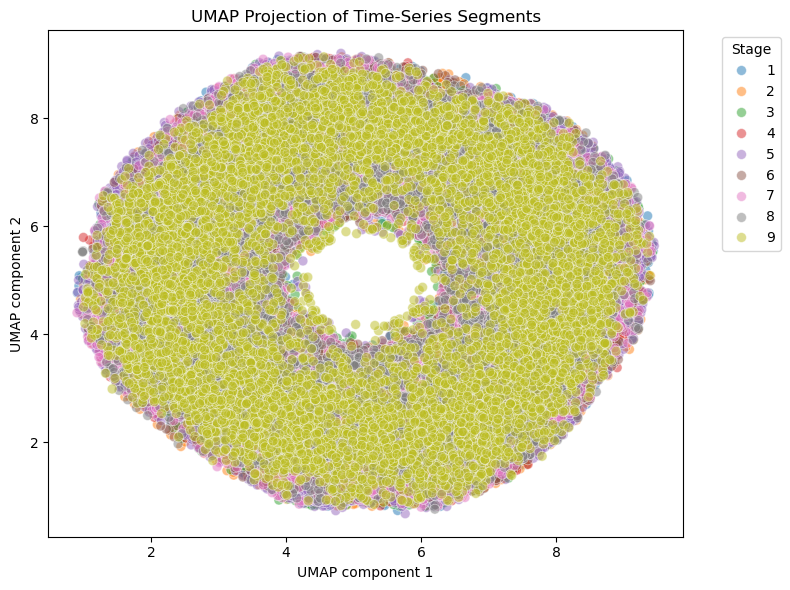

In [11]:
from umap import UMAP

# X: shape (samples, win_len, num_features) → reshape to 2D: (samples, win_len * num_features)
X_pre_aen = X.reshape(X.shape[0], -1)

# UMAP expects 2D input: (samples, features)
umap = UMAP(n_components=2, n_neighbors=30, min_dist=0.1, metric='euclidean', random_state=42)
X_umap = umap.fit_transform(X_pre_aen)

# Create DataFrame
UMAPdf = pd.DataFrame(X_umap, columns=['UMAP component 1', 'UMAP component 2'])
UMAPdf['Stage'] = Y  # integer class labels

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='UMAP component 1',
    y='UMAP component 2',
    hue='Stage',
    palette='tab10',
    data=UMAPdf,
    alpha=0.5,
    s=50
)
plt.title('UMAP Projection of Time-Series Segments')
plt.legend(title='Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [13]:
UMAPdf

,UMAP component 1,UMAP component 2,Stage
0,3.751395,5.310203,1
1,5.236804,3.558664,1
2,6.550008,5.451243,1
3,4.365921,6.289572,1
4,4.165211,3.803719,1
...,...,...,...
69078,2.865536,8.244714,9
69079,3.539867,1.426661,9
69080,9.093054,4.408254,9
69081,4.684405,8.904059,9


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Extract input features and integer labels
X_tsne = UMAPdf[['UMAP component 1', 'UMAP component 2']].values
Y = UMAPdf['Stage'].values - 1  # Convert 1–9 → 0–8

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tsne, Y, test_size=0.2, random_state=42, shuffle=True
)

# Define the model
model = Sequential([
    Dense(1024, input_shape=(2,), activation='relu'),
    Dropout(0.1),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(9, activation='softmax')  # 9 classes
])

# Compile with sparse categorical loss
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Show summary
model.summary()

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 702,729 (2.68 MB)

 Trainable params: 702,729 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test)
)


Epoch 1/30
864/864 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.1090 - loss: 2.2001 - val_accuracy: 0.1105 - val_loss: 2.1973
Epoch 2/30
864/864 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.1104 - loss: 2.1974 - val_accuracy: 0.1129 - val_loss: 2.1974
Epoch 3/30
864/864 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.1075 - loss: 2.1974 - val_accuracy: 0.1065 - val_loss: 2.1975
Epoch 4/30
864/864 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.1132 - loss: 2.1973 - val_accuracy: 0.1086 - val_loss: 2.1974
Epoch 5/30
864/864 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.1118 - loss: 2.1973 - val_accuracy: 0.1103 - val_loss: 2.1973
Epoch 6/30
864/864 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.1109 - loss: 2.1973 - val_accuracy: 0.1065 - val_loss: 2.1973
Epoch 7/30
864/864 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.1106 - loss: 2.1973 - val_accuracy: 0.1139 - val_loss: 2.1974
Epoch 8/30
864/864 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.1128 - loss: 2.1973 - 